# Analysis of WSPs for quantifying hardness

## Setting Up Imports

In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_pickle("results.pkl")
df["wsp/point"] = df["wsp_count_2.0"] / df["num_points"]

print("Number of optimatlly solved instances: ", df["opt_len"].isna().sum())

df

Number of optimatlly solved instances:  56


,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp5_len,wsp_count_2.0,ls_len,ls_q_len,wsp/point
name,,,,,,,,,,
a280,280,2.586770e+03,3.161004e+03,4.847061e+03,NaN,NaN,2571,2769.255661,2956.917525,9.182143
ara238025,238025,NaN,7.591498e+05,1.176390e+06,NaN,NaN,3032365,NaN,NaN,12.739691
bby34656,34656,NaN,1.253833e+05,1.966541e+05,NaN,NaN,412676,NaN,NaN,11.907779
bbz25234,25234,NaN,8.772034e+04,1.414553e+05,NaN,NaN,299703,NaN,NaN,11.876952
bch2762,2762,NaN,1.073362e+04,1.624823e+04,NaN,NaN,28611,NaN,NaN,10.358798
...,...,...,...,...,...,...,...,...,...,...
Tnm85,85,1.117368e+06,1.257389e+06,1.143585e+07,NaN,NaN,463,NaN,NaN,5.447059
Tnm88,88,1.172726e+06,1.320711e+06,1.243584e+07,NaN,NaN,475,NaN,NaN,5.397727
Tnm91,91,1.228712e+06,1.338013e+06,1.347724e+07,NaN,NaN,461,NaN,NaN,5.065934


## Calculating and Plotting global WSP density

258


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          wsp_count_2.0   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              6674.
Date:                Sun, 26 May 2024   Prob (F-statistic):                   6.88e-186
Time:                        15:57:52   Log-Likelihood:                         -3478.9
No. Observations:                 258   AIC:                                      6960.
Df Residuals:                     257   BIC:                                      6963.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_points    13.7741      0.169     81.695      0.000      13.442      14.106
==============================================================================
Omnibus:                      136.648   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12420.864
Skew:                           1.108   Prob(JB):                         0.00
Kurtosis:                      36.919   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

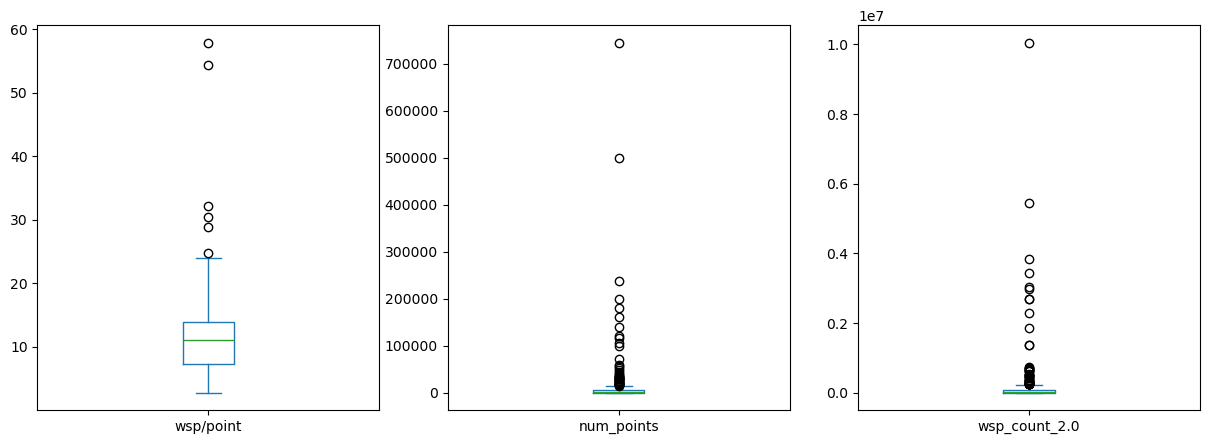

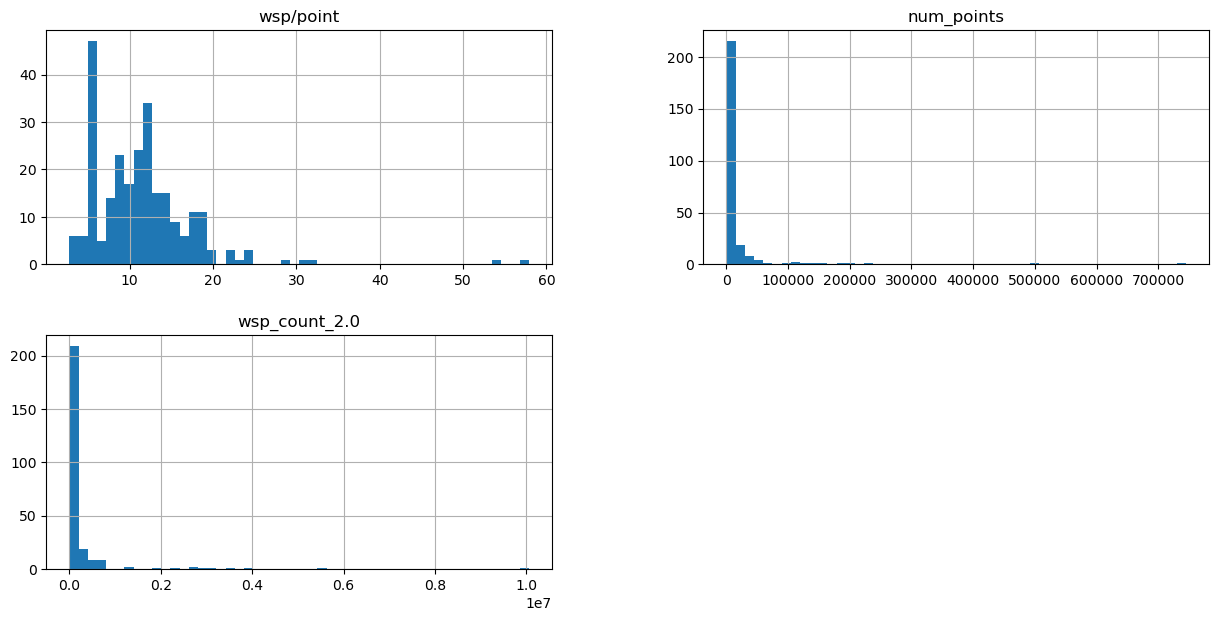

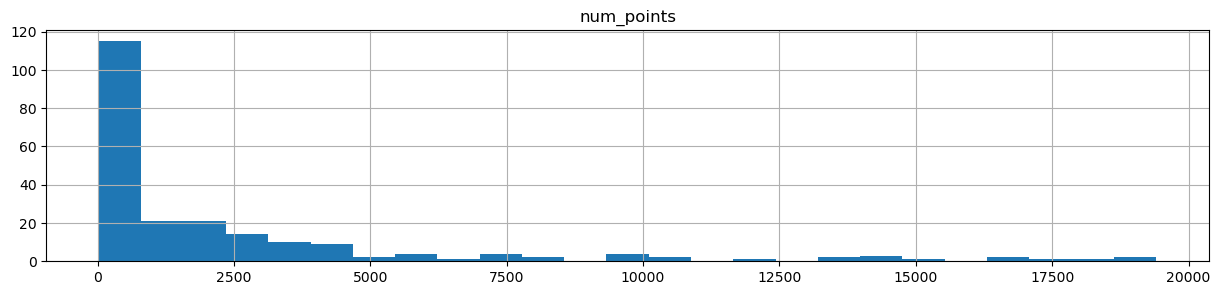

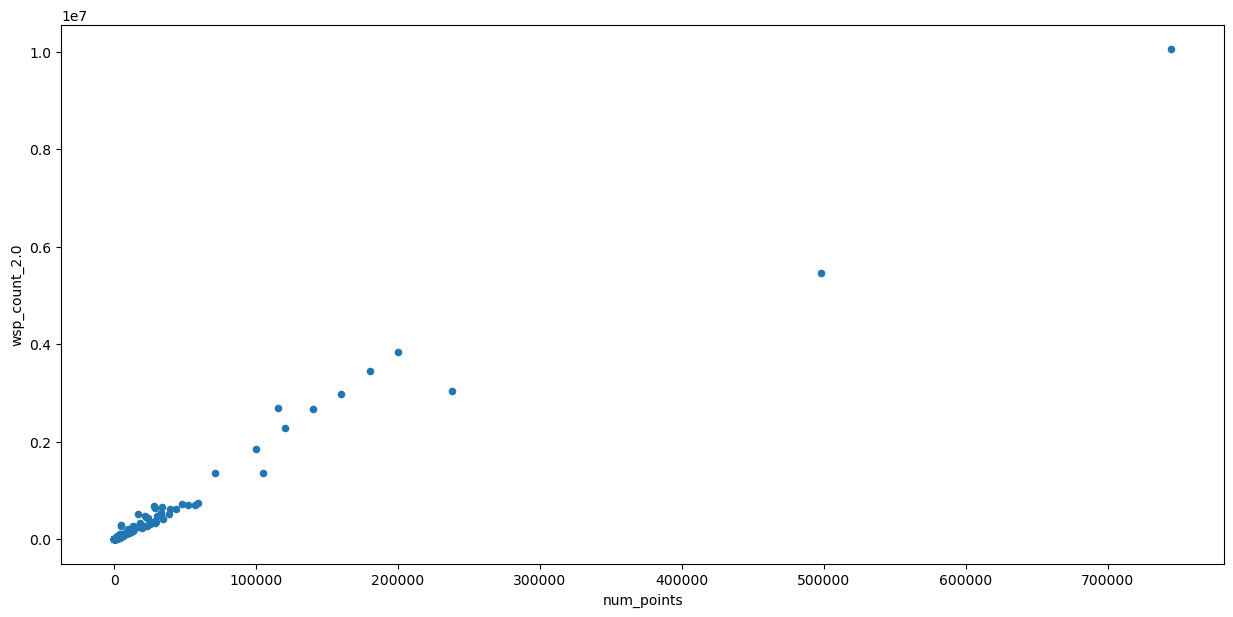

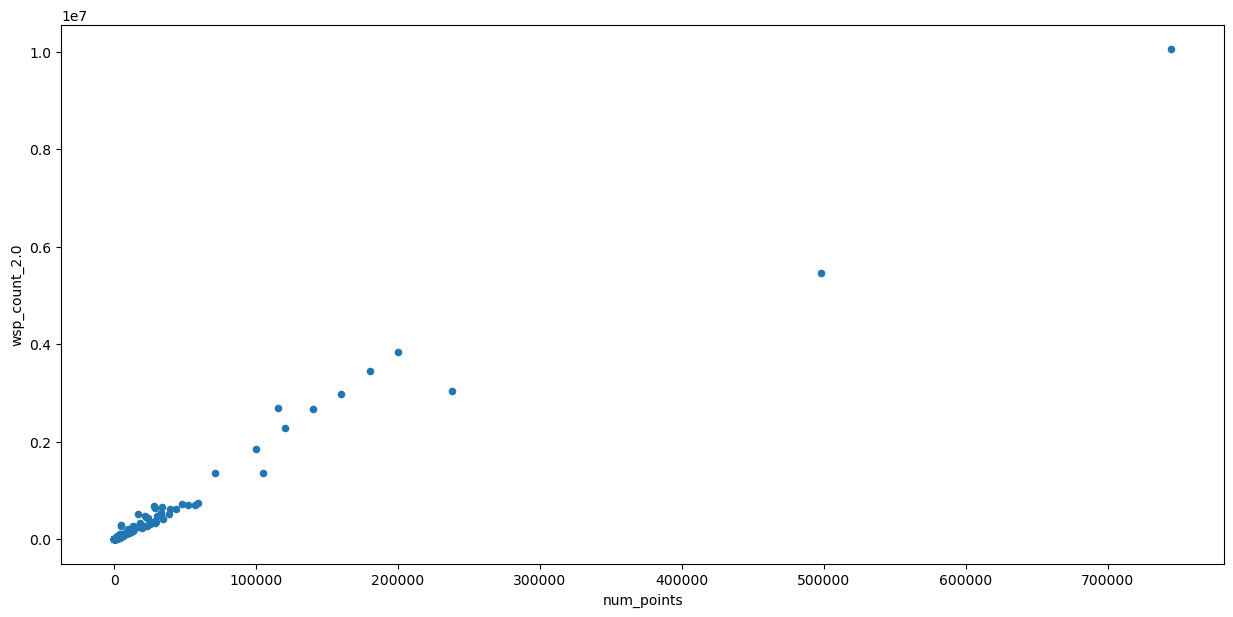

In [2]:
# Remove NAN wsp_counts and tell cells their format
df = df[~df['wsp_count_2.0'].isna()]
print(len(df))

fig, axs = plt.subplots(1,3, figsize=(15,5))
df["wsp/point"].plot.box(ax=axs[0])
df["num_points"].plot.box(ax=axs[1])
df["wsp_count_2.0"].plot.box(ax=axs[2])

df.hist(column=["wsp/point", "num_points", "wsp_count_2.0"], bins=50, figsize=(15,7))
df[df["num_points"] < 20000].hist(column=["num_points"], bins=25, figsize=(15,3))

df.plot.scatter("num_points", "wsp_count_2.0", figsize=(15,7)) # TODO: make this graph look better

df.plot.scatter("num_points", "wsp_count_2.0", figsize=(15,7),) # TODO: make this graph look better

results = sm.OLS(df["wsp_count_2.0"].astype(int), df["num_points"].astype(int)).fit()
results.summary()

## Remove problems which don't have a optimum (or near optimum) solution

In [3]:
df = df[~df['opt_len'].isna()] # remove problems without optimal lens

## Calculate the error for each algorithm to the optimum (or near optimum)

In [10]:
df["nn error"] = df["nn_len"] / df["opt_len"] - 1.0
df['ls error'] = df["ls_len"] / df["opt_len"] - 1.0
df["lsq error"] = df["ls_q_len"] / df["opt_len"] - 1.0
print(len(df))
df["num_points"].describe()

202


count           202.0
mean      8079.881188
std      27720.343588
min              29.0
25%            136.75
50%             437.5
75%           2316.25
max          200000.0
Name: num_points, dtype: Float64

## Plot analysis of WSPs hardness wrt. nearest neighbour

wsp/point    0.018281
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               nn error   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1018.
Date:                Sun, 26 May 2024   Prob (F-statistic):                    1.29e-80
Time:                        16:07:35   Log-Likelihood:                          193.59
No. Observations:                 202   AIC:                                     -385.2
Df Residuals:                     201   BIC:                                     -381.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.0183      0.001     31.909      0.000       0.017       0.019
==============================================================================
Omnibus:                       14.470   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               42.039
Skew:                           0.037   Prob(JB):                     7.44e-10
Kurtosis:                       5.234   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

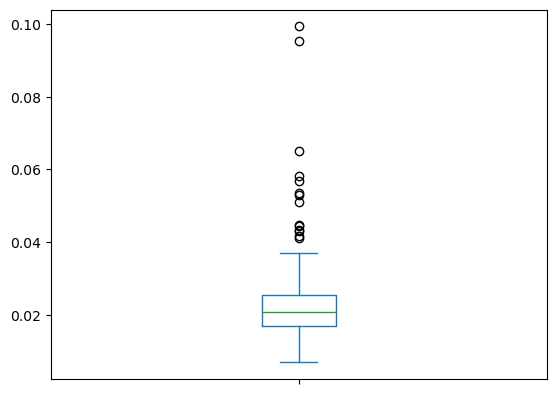

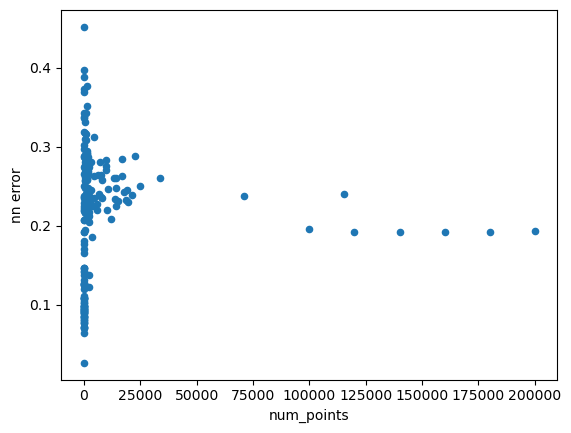

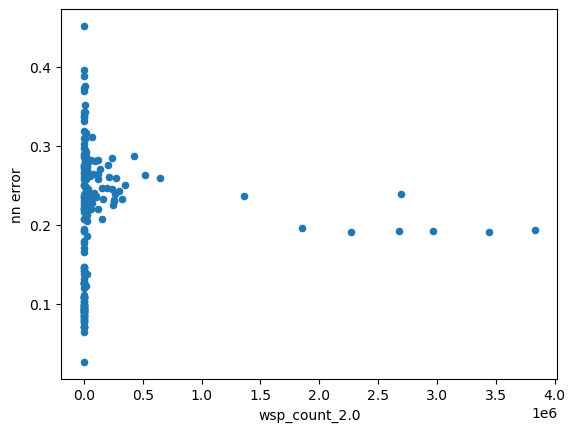

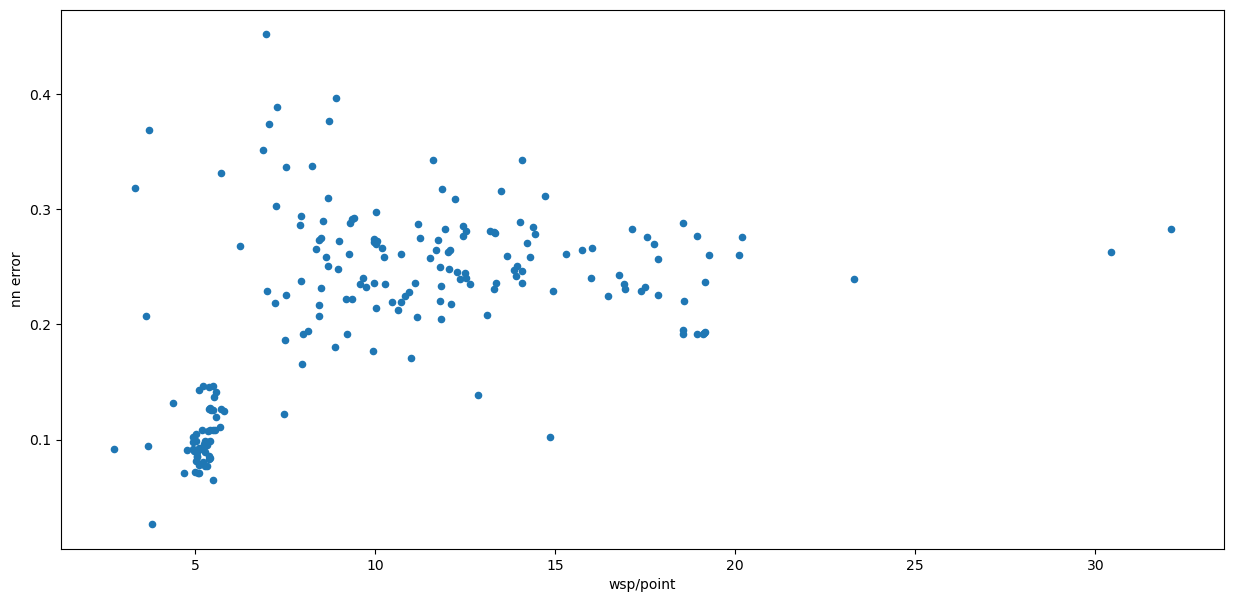

In [13]:
# df = df.drop("dj38") # outlier screws up how graph renders r^2 is 0.88 w/o them
# df = df.drop("dkd1973")

(df["nn error"] / df["wsp/point"]).plot.box()

df.plot.scatter("num_points", "nn error")
df.plot.scatter("wsp_count_2.0", "nn error")
fig, ax = plt.subplots(figsize=(15,7))
df.plot.scatter("wsp/point", "nn error", ax=ax)

# for k, v in df.iterrows():
#     ax.annotate(k, (v["wsp/point"], v["nn error"]))

results = sm.OLS(df["nn error"].astype(float), df["wsp/point"].astype(float)).fit()
print(results.params)
results.summary()

## Plot analysis of WSPs hardness wrt. local search based on nearest neighbour

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ls error   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              536.6
Date:                Sun, 26 May 2024   Prob (F-statistic):                    7.99e-35
Time:                        15:58:22   Log-Likelihood:                         -30.236
No. Observations:                  72   AIC:                                      62.47
Df Residuals:                      71   BIC:                                      64.75
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.0984      0.004     23.164      0.000       0.090       0.107
==============================================================================
Omnibus:                        6.315   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.623
Skew:                          -0.659   Prob(JB):                       0.0601
Kurtosis:                       3.373   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

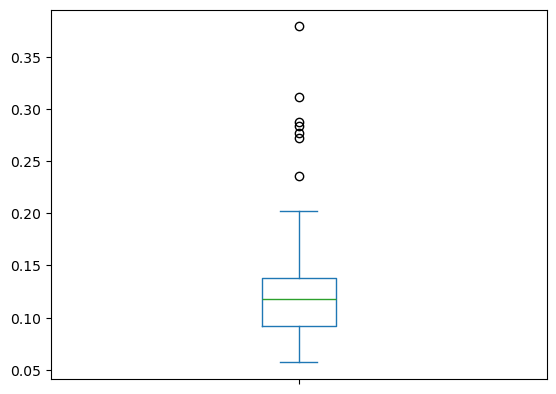

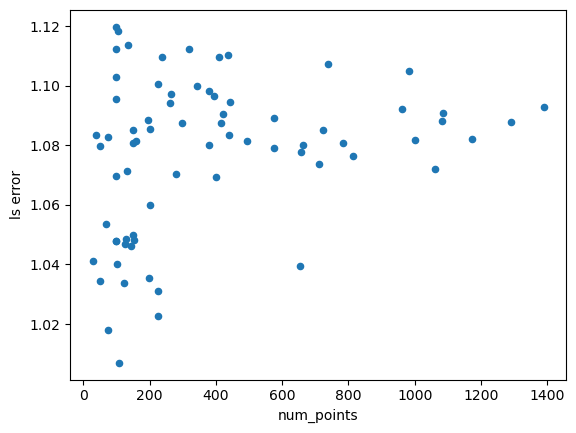

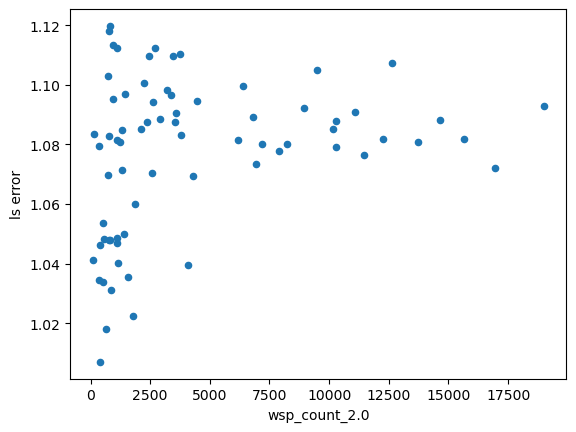

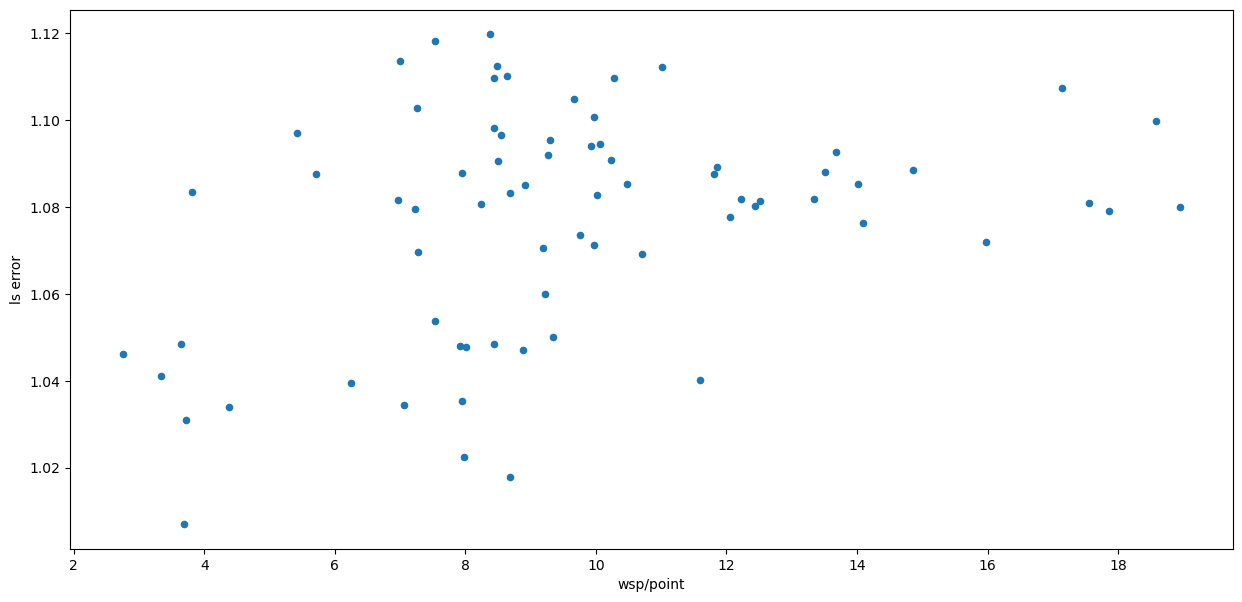

In [7]:
dfs = df[~df['ls_len'].isna()] # remove problems without optimal lens

(dfs["ls error"] / dfs["wsp/point"]).plot.box()

dfs.plot.scatter("num_points", "ls error")
dfs.plot.scatter("wsp_count_2.0", "ls error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp/point", "ls error", ax=ax)

# for k, v in dfs.iterrows():
#     ax.annotate(k, (v["wsp/point"], v["nn error"]))

sm.add_constant(1)
results = sm.OLS(dfs["ls error"].astype(float), dfs["wsp/point"].astype(float)).fit()
results.summary()

## Plot analysis of WSPs hardness wrt. quick local search based on nearest neighbour

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              lsq error   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              541.3
Date:                Sun, 26 May 2024   Prob (F-statistic):                    6.06e-35
Time:                        14:06:03   Log-Likelihood:                         -34.813
No. Observations:                  72   AIC:                                      71.63
Df Residuals:                      71   BIC:                                      73.90
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.1053      0.005     23.267      0.000       0.096       0.114
==============================================================================
Omnibus:                        6.115   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.509
Skew:                          -0.663   Prob(JB):                       0.0636
Kurtosis:                       3.280   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

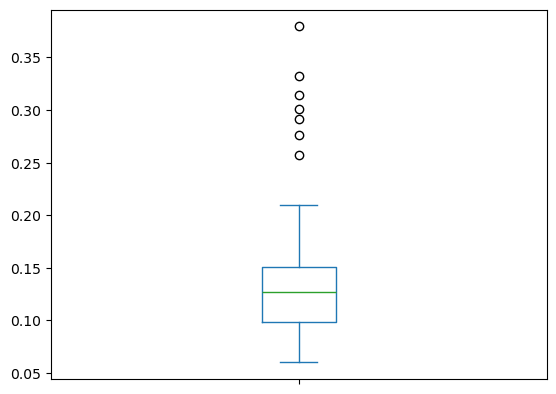

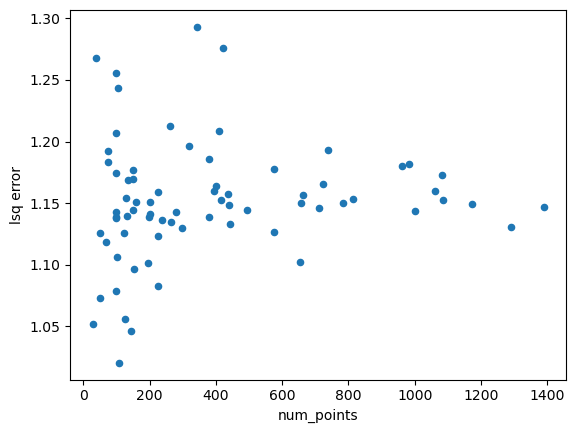

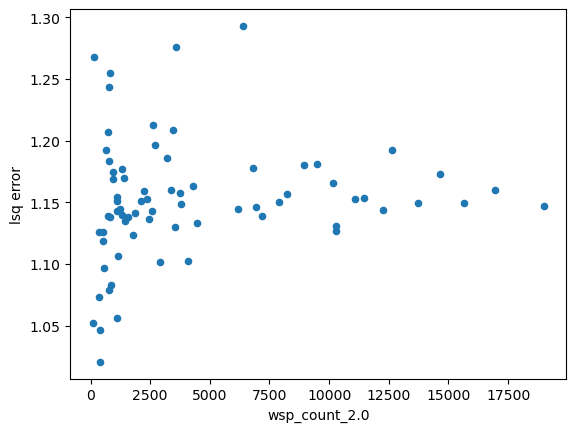

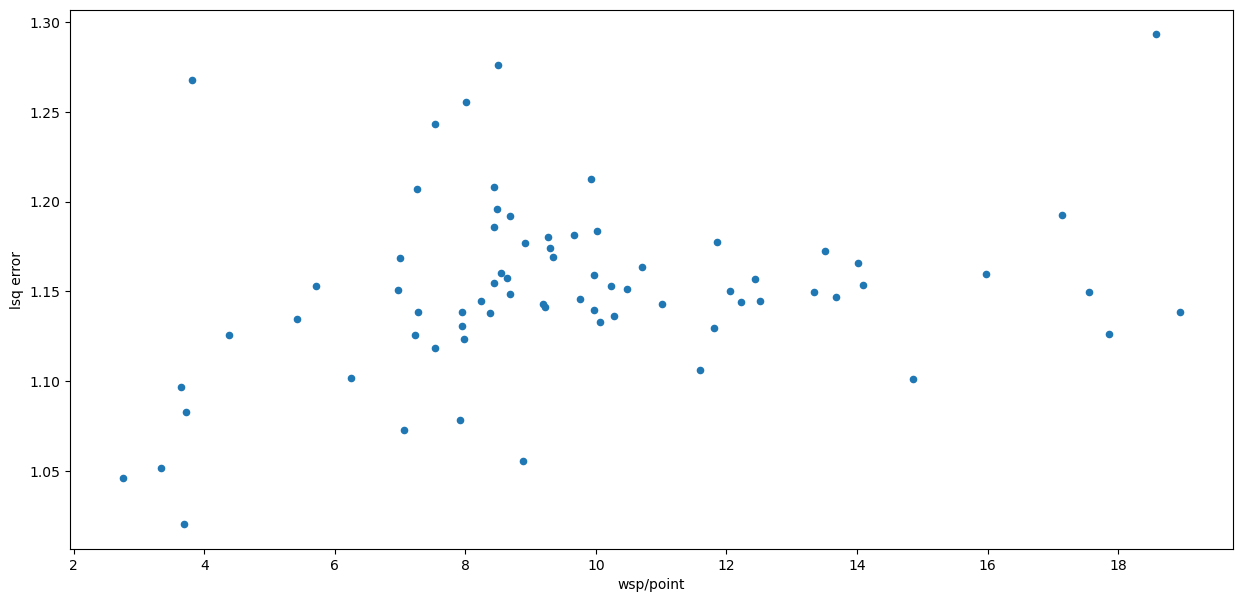

In [7]:
dfs = df[~df['ls_q_len'].isna()] # remove problems without optimal lens

(dfs["lsq error"] / dfs["wsp/point"]).plot.box()

dfs.plot.scatter("num_points", "lsq error")
dfs.plot.scatter("wsp_count_2.0", "lsq error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp/point", "lsq error", ax=ax)

results = sm.OLS(dfs["lsq error"].astype(float), dfs["wsp/point"].astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              lsq error   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              541.3
Date:                Sun, 26 May 2024   Prob (F-statistic):                    6.06e-35
Time:                        14:06:03   Log-Likelihood:                         -34.813
No. Observations:                  72   AIC:                                      71.63
Df Residuals:                      71   BIC:                                      73.90
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.1053      0.005     23.267      0.000       0.096       0.114
==============================================================================
Omnibus:                        6.115   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.509
Skew:                          -0.663   Prob(JB):                       0.0636
Kurtosis:                       3.280   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

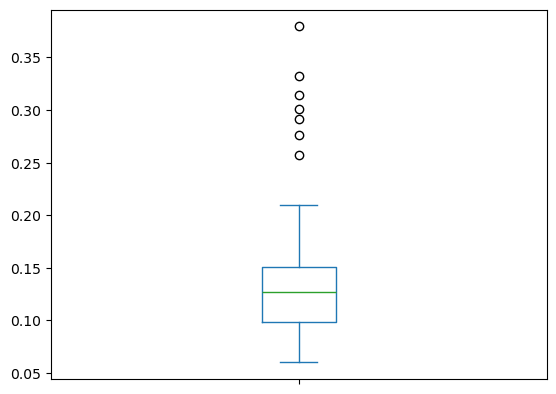

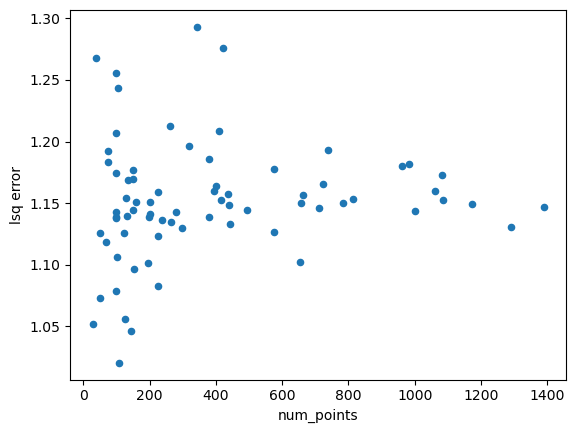

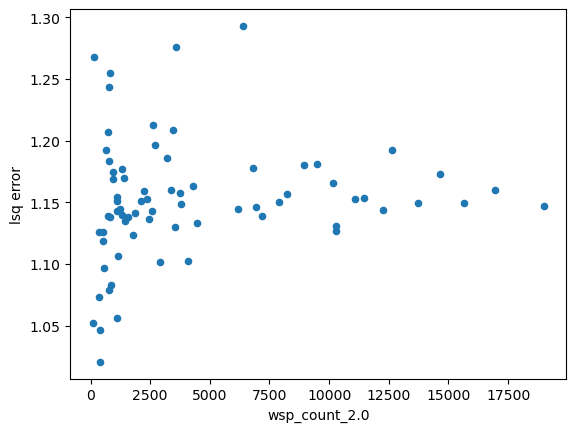

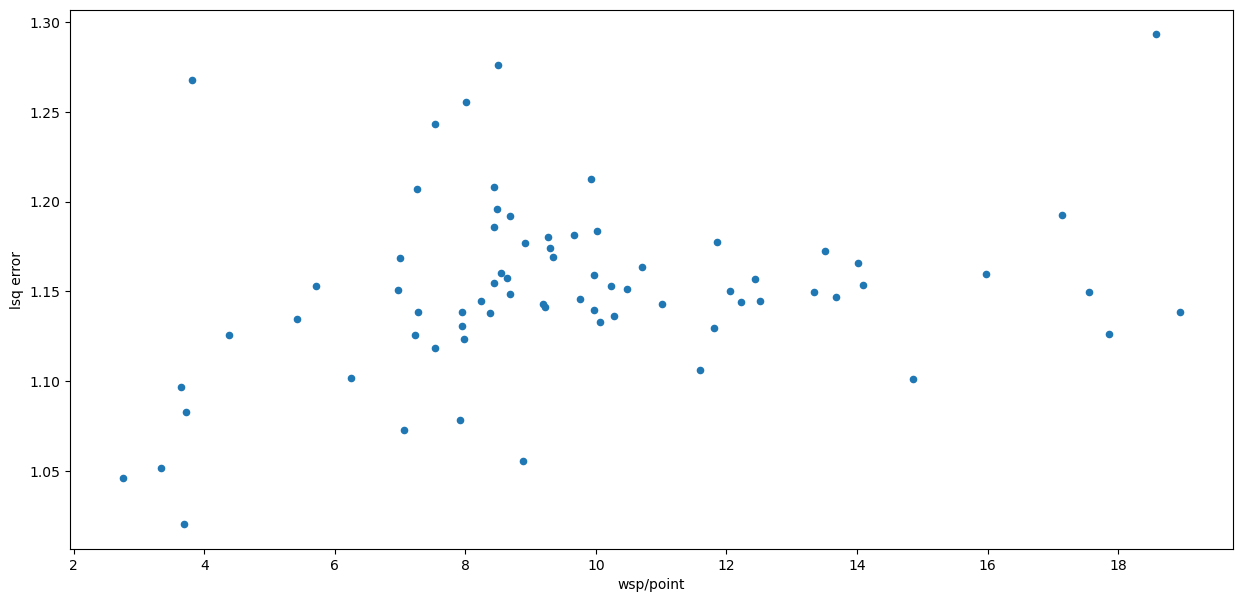

In [8]:
dfs = df[~df['ls_q_len'].isna()] # remove problems without optimal lens

(dfs["lsq error"] / dfs["wsp/point"]).plot.box()

dfs.plot.scatter("num_points", "lsq error")
dfs.plot.scatter("wsp_count_2.0", "lsq error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp/point", "lsq error", ax=ax)

results = sm.OLS(dfs["lsq error"].astype(float), dfs["wsp/point"].astype(float)).fit()
results.summary()